# We reproduce results from section 6.4.1 in 'Spectroscopic Ellipsometry', by H. Fujiwara.

Author: O. Castany, M. Müller

Verification of the code against results presented in Fujiwara's book 'Spectroscopic Ellipsometry', section 6.4.1
(p. 237). We reproduce figures 6.16 and 6.17.

In [1]:
import numpy as np
import elli
import matplotlib.pyplot as plt

## Setting up the materials

In [2]:
# Front half-space (air)
air = elli.AIR

# Anisotropic substrate
n_o = 2.0  #  ordinary index of thin layer
n_e = 2.5  #  extraordinary index of thin layer

uniaxialMaterial = elli.UniaxialMaterial(
    elli.ConstantRefractiveIndex(n_o), elli.ConstantRefractiveIndex(n_e)
)

## We reproduce figure 6.16 (p. 238)

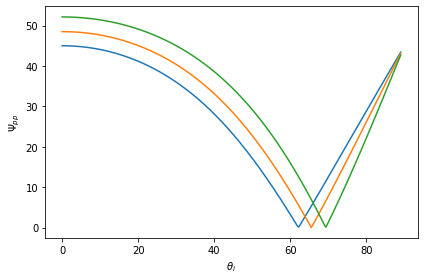

In [3]:
# Orientations of the anisotropic substrate
Φ_E = 90  #  1st Euler angle
θ_E_list = [0, 45, 90]  #  2nd Eulet angle

# Incidence angles
Φ_i_list = np.linspace(0, 89, 300)  #  array of Φ_i values

data = elli.ResultList()

for θ_E in θ_E_list:
    R = elli.rotation_euler(Φ_E, θ_E, 0)
    uniaxialMaterial.set_rotation(R)
    s = elli.Structure(air, [], uniaxialMaterial)
    for Φ_i in Φ_i_list:
        data.append(s.evaluate(500, Φ_i))

Psi = data.psi_pp.reshape(3, 300).T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Φ_i_list, Psi)
ax.set_xlabel(r"$\theta_i$")
ax.set_ylabel(r"$\Psi_{pp}$")

plt.tight_layout()

## We reproduce figure 6.17 (p. 239)

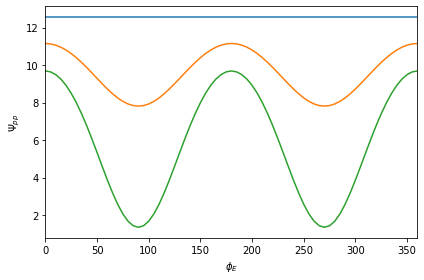

In [4]:
Φ_i = 70  #  70° incidence angle

# Orientations of the anisotropic substrate
Φ_E_list = np.linspace(0, 360, 36 * 2 + 1)  #  1st Euler angle
θ_E_list = [0, 45, 90]  #  2nd Euler angle

data2 = elli.ResultList()

for θ_E in θ_E_list:
    for Φ_E in Φ_E_list:
        R = elli.rotation_euler(Φ_E, θ_E, 0)
        uniaxialMaterial.set_rotation(R)
        s = elli.Structure(air, [], uniaxialMaterial)
        data2.append(s.evaluate(500, Φ_i))

Psi = data2.psi_pp.reshape(3, 73).T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Φ_E_list, Psi)
ax.set_xlim(0, 360)
ax.set_xlabel(r"$\phi_E$")
ax.set_ylabel(r"$\Psi_{pp}$")

plt.tight_layout()
plt.show()